### generate figures and label images for HIOS TDS manuscript
### fig6 (C60 + MoS2 model)

Package versions:<br>
python==3.10.8<br>
numpy==1.23.5<br>
matplotlib==3.6.2<br>
ipywidgets==8.0.4<br>
matplotlib_scalebar==0.8.1<br>
pickleshare==0.7.5

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

from datetime import datetime
import pickle

In [3]:
figsize_w = 15/2.54
fontsize = 12
dpi = 640

In [4]:
# location of model illustrations
img_path_C60fcc = r"..\data\Figure 6\C60-fcc_on_MoS2_larger1_ABC Image.tif"
img_path_C60hcp = r"..\data\Figure 6\C60-hcp_on_MoS2_larger1_AB Image.tif"
# location of experimental diffraction patterns (selected and stored in combine images_fig4...)
img_path_C60fcc_exp = r"..\data\Figure 6\MoS2_C60_largest RFA value absmap6.pkl"
img_path_C60hcp_exp = r"..\data\Figure 6\MoS2_C60_largest RFA value absmap6_AB.pkl"

In [5]:
# load model illustrations
img_C60fcc = plt.imread(img_path_C60fcc)
img_C60hcp = plt.imread(img_path_C60hcp)

In [6]:
# load experimental diffraction patterns
with open(img_path_C60fcc_exp, 'rb') as f:
    data_C60fcc = pickle.load(f)
for i in list(data_C60fcc.keys()):
    exec('C60fcc' + i + '= ' + '(data_C60fcc[i])')

with open(img_path_C60hcp_exp, 'rb') as f:
    data_C60hcp = pickle.load(f)
for i in list(data_C60hcp.keys()):
    exec('C60hcp' + i + '= ' + '(data_C60hcp[i])')

In [7]:
C60fccpick_result_maxABC.shape

(512, 512)

In [8]:
C60hcppick_result_maxAB.shape

(512, 512)

In [9]:
imgC60_shape = img_C60fcc.shape
imgC60_shape

(1291, 2558, 4)

In [10]:
img_C60hcp.shape

(1291, 2558, 4)

In [11]:
# crop illustrations
imgC60_cx = int(imgC60_shape[1]/2)
imgC60_cy = int(imgC60_shape[0]/2)
imgC60_Nx = 1200
imgC60_Ny = 1200
img_C60fcc = img_C60fcc[int(imgC60_cy - imgC60_Ny/2) : int(imgC60_cy + imgC60_Ny/2), int(imgC60_cx - imgC60_Nx/2) : int(imgC60_cx + imgC60_Nx/2)]
img_C60hcp = img_C60hcp[int(imgC60_cy - imgC60_Ny/2) - 17 : int(imgC60_cy + imgC60_Ny/2) - 17 , int(imgC60_cx - imgC60_Nx/2) + 7 : int(imgC60_cx + imgC60_Nx/2) + 7]

In [12]:
img_C60fcc.shape

(1200, 1200, 4)

In [13]:
img_C60hcp.shape

(1200, 1200, 4)

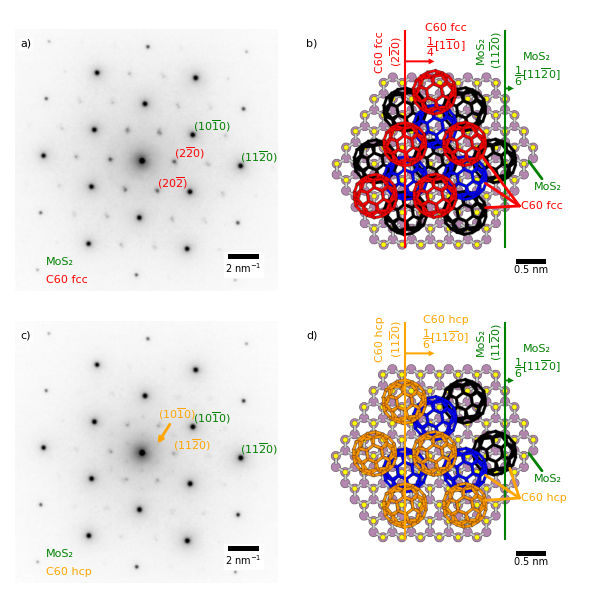

In [14]:
fs1 = 8
fs0 = fs1

vec_MoS2_0x = 932; vec_MoS2_0y = 274
vec_MoS2_l = (894-810)/2
line_MoS2_y0 = 10
vec_C60_0x = 474; vec_C60_0y = 150
vec_C60_l = (747-474)/2
line_C60_y0 = 10
vec_C60hcp_l = (747-474)/2

param = {'xycoords':'data', 'textcoords': 'data', 'arrowprops': dict(facecolor='black',width= 2,headwidth=6, shrink=0.0), 'fontsize': fs1,
         'horizontalalignment': 'right', 'verticalalignment':'center','bbox':dict(boxstyle="square,pad=0.3", fc="w", ec="w", lw=2)}

param1 = {'textcoords': 'axes fraction', 'horizontalalignment': 'left', 'verticalalignment':'top', 'fontsize': fs1,
          'bbox':dict(boxstyle="square,pad=0.0", fc="w", ec="w", lw=2)} #axes points
param2 = {'horizontalalignment': 'left', 'verticalalignment':'center', 'fontsize': fs1,
          }

C60_HKLs_param = {'horizontalalignment':'left', 'verticalalignment': 'bottom', 'fontsize': fs0, 'c':'r'}
C60_hcp_HKLs_param = {'horizontalalignment':'left', 'verticalalignment': 'bottom', 'fontsize': fs0, 'c':'orange'}

MoS2_HKLs_param = {'horizontalalignment':'left', 'verticalalignment': 'bottom', 'fontsize': fs0, 'c':'g'}

scalebar_fs = 7
scale_reci = 0.033180 # nm^-1
scale_real = 1.9/(889.-376.) # 

xy_pos = (0.02,0.96)

mat_locx = 60
mat_locy = 500 #-mat_locx


fig, ((ax1,ax0),(ax3,ax2)) = plt.subplots(2,2,figsize = (figsize_w,6) ) # facecolor = 'gray'
ax0.annotate('b)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)
im0 = ax0.imshow(img_C60fcc)
ax0.axis('off')
ax0.add_artist(matplotlib.lines.Line2D([vec_MoS2_0x, vec_MoS2_0x], [line_MoS2_y0, 1000], color = 'g'))
ax0.quiver(vec_MoS2_0x, vec_MoS2_0y, vec_MoS2_l, 0, color='g', units='xy', scale = 1, headaxislength = 3, headlength = 3)
ax0.text(x = vec_MoS2_0x + vec_MoS2_l, y = vec_MoS2_0y, color = 'g', s =  'MoS\u2082\n' + r'$\dfrac{1}{6}$[11$\overline{2}$0]', ha= 'left', va = 'bottom', size = fs1, multialignment = 'center') 
ax0.text(x = vec_MoS2_0x-5, y = line_MoS2_y0, color = 'g', s =  'MoS\u2082\n' + r'(11$\overline{2}$0)', ha= 'right', va = 'top', size = fs1, rotation = 'vertical', multialignment = 'center')

ax0.add_artist(matplotlib.lines.Line2D([vec_C60_0x, vec_C60_0x], [line_C60_y0, 1000], color = 'r'))
ax0.quiver(vec_C60_0x, vec_C60_0y, vec_C60_l, 0, color='r', units='xy', scale = 1, headaxislength = 3, headlength = 3)
ax0.text(x = vec_C60_0x + vec_C60_l+50, y = vec_C60_0y-10, color = 'r', s =  'C60 fcc\n' + r'$\dfrac{1}{4}$[1$\overline{1}$0]', ha= 'center', va = 'bottom', size = fs1, multialignment = 'center', ) 
ax0.text(x = vec_C60_0x-5, y = line_C60_y0, color = 'r', s =  'C60 fcc\n' + r'(2$\overline{2}$0)', ha= 'right', va = 'top', size = fs1, rotation = 'vertical', multialignment = 'center') 

arr_loc_MoS2 = (1043, 608)
text_loc_MoS2 = (1065, 812 - 75)
ax0.annotate('MoS\u2082', xy=(arr_loc_MoS2[0],arr_loc_MoS2[1]), xytext=(text_loc_MoS2[0],text_loc_MoS2[1]), fontsize = fs0, color = 'green',
                 arrowprops=dict(arrowstyle="-",linewidth= 2, color = 'green', shrinkA = 0, shrinkB = 0), textcoords = 'data')

arr_loc_C60A = (832-5, 582)
arr_loc_C60B = (844, 708)
arr_loc_C60C = (849-5, 820)
text_loc_C60 = (999, 812)
ax0.text(x = text_loc_C60[0]+8, y = text_loc_C60[1], s = r'C60 fcc', ha = 'left', va =  'center', fontsize = fs0, c ='red')
ax0.annotate('', xy=(arr_loc_C60A[0],arr_loc_C60A[1]), xytext=(text_loc_C60[0],text_loc_C60[1]), fontsize = fs0, color = 'red',
                 arrowprops=dict(arrowstyle="-",linewidth= 2, color = 'red', shrinkA = 0, shrinkB = 0), textcoords = 'data')
ax0.annotate('', xy=(arr_loc_C60B[0],arr_loc_C60B[1]), xytext=(text_loc_C60[0],text_loc_C60[1]), fontsize = fs0, color = 'red',
                 arrowprops=dict(arrowstyle="-",linewidth= 2, color = 'red', shrinkA = 0, shrinkB = 0), textcoords = 'data')
ax0.annotate('', xy=(arr_loc_C60C[0],arr_loc_C60C[1]), xytext=(text_loc_C60[0],text_loc_C60[1]), fontsize = fs0, color = 'red',
                 arrowprops=dict(arrowstyle="-",linewidth= 2, color = 'red', shrinkA = 0, shrinkB = 0), textcoords = 'data')

scalebar0 = ScaleBar(scale_real, 'nm',  fixed_value = 0.5 , location = 'lower right', pad = 0.1, sep = 1,
                       border_pad = 1.0, frameon=True, length_fraction=0.15, width_fraction = 0.02,font_properties = {'size': scalebar_fs})
ax0.add_artist(scalebar0)

ax1.annotate('a)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)
im1 = ax1.imshow(C60fccpick_result_maxABC, cmap = 'Greys', norm=matplotlib.colors.LogNorm())
ax1.axis('off')

ax1.text(x = 347.0 , y = 206.0, s =r'(10$\overline{1}$0)', **MoS2_HKLs_param) 
ax1.text(x = 440.0 , y = 266.0, s =r'(11$\overline{2}$0)', **MoS2_HKLs_param) 
ax1.text(x = 277.0 , y = 316.0, s =r'(20$\overline{2}$)', **C60_HKLs_param) 
ax1.text(x = 310.0 , y = 259.0, s =r'(2$\overline{2}$0)', **C60_HKLs_param) 
ax1.text(x =mat_locx , y = mat_locy - 35, s ='MoS\u2082', **MoS2_HKLs_param) 
ax1.text(x =mat_locx , y = mat_locy, s ='C60 fcc', **C60_HKLs_param) 


scalebar1 = ScaleBar(scale_reci, '1/nm', dimension="si-length-reciprocal", location = 'lower right', pad = 0.1,sep = 2, 
                       border_pad = 1.0, frameon=True, length_fraction=0.25,
                      width_fraction = 0.02,font_properties = {'size': scalebar_fs})
ax1.add_artist(scalebar1)


ax2.annotate('d)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)
im2 = ax2.imshow(img_C60hcp)
ax2.axis('off')
ax2.add_artist(matplotlib.lines.Line2D([vec_MoS2_0x, vec_MoS2_0x], [line_MoS2_y0, 1000], color = 'g'))
ax2.quiver(vec_MoS2_0x, vec_MoS2_0y, vec_MoS2_l, 0, color='g', units='xy', scale = 1, headaxislength = 3, headlength = 3)
ax2.text(x = vec_MoS2_0x + vec_MoS2_l, y = vec_MoS2_0y, color = 'g', s =  'MoS\u2082\n' + r'$\dfrac{1}{6}$[11$\overline{2}$0]', ha= 'left', va = 'bottom', size = fs1, multialignment = 'center') 
ax2.text(x = vec_MoS2_0x-5, y = line_MoS2_y0, color = 'g', s =  'MoS\u2082\n' + r'(11$\overline{2}$0)', ha= 'right', va = 'top', size = fs1, rotation = 'vertical', multialignment = 'center') 

ax2.add_artist(matplotlib.lines.Line2D([vec_C60_0x, vec_C60_0x], [line_C60_y0, 1000], color = 'orange'))
ax2.quiver(vec_C60_0x, vec_C60_0y, vec_C60hcp_l, 0, color='orange', units='xy', scale = 1, headaxislength = 3, headlength = 3)
ax2.text(x = vec_C60_0x + vec_C60hcp_l+50, y = vec_C60_0y-10, color = 'orange', s =  'C60 hcp\n' + r'$\dfrac{1}{6}$[11$\overline{2}$0]', ha= 'center', va = 'bottom', size = fs1, multialignment = 'center', ) 
ax2.text(x = vec_C60_0x-5, y = line_C60_y0-30, color = 'orange', s =  'C60 hcp\n' + r'(11$\overline{2}$0)', ha= 'right', va = 'top', size = fs1, rotation = 'vertical', multialignment = 'center') 

arr_loc_MoS2 = (973+3, 421)
arr_loc_MoS2 = (1043, 608)
text_loc_MoS2 = (1065, 812 - 75)
ax2.annotate('MoS\u2082', xy=(arr_loc_MoS2[0],arr_loc_MoS2[1]), xytext=(text_loc_MoS2[0],text_loc_MoS2[1]), fontsize = fs0, color = 'green',
                 arrowprops=dict(arrowstyle="-",linewidth= 2, color = 'green', shrinkA = 0, shrinkB = 0), textcoords = 'data')

arr_loc_C60A1 = (955, 676)
arr_loc_C60B1 = (844, 708)
arr_loc_C60C1 = (844, 823)
text_loc_C60 = (999, 812)
ax2.text(x = text_loc_C60[0]+8, y = text_loc_C60[1], s = r'C60 hcp', ha = 'left', va =  'center', fontsize = fs0, c ='orange')
ax2.annotate('', xy=(arr_loc_C60A1[0],arr_loc_C60A1[1]), xytext=(text_loc_C60[0],text_loc_C60[1]), fontsize = fs0, color = 'orange',
                 arrowprops=dict(arrowstyle="-",linewidth= 2, color = 'orange', shrinkA = 0, shrinkB = 0), textcoords = 'data')
ax2.annotate('', xy=(arr_loc_C60B1[0],arr_loc_C60B1[1]), xytext=(text_loc_C60[0],text_loc_C60[1]), fontsize = fs0, color = 'orange',
                 arrowprops=dict(arrowstyle="-",linewidth= 2, color = 'orange', shrinkA = 0, shrinkB = 0), textcoords = 'data')
ax2.annotate('', xy=(arr_loc_C60C1[0],arr_loc_C60C1[1]), xytext=(text_loc_C60[0],text_loc_C60[1]), fontsize = fs0, color = 'orange',
                 arrowprops=dict(arrowstyle="-",linewidth= 2, color = 'orange', shrinkA = 0, shrinkB = 0), textcoords = 'data')


scalebar2 = ScaleBar(scale_real, 'nm',  fixed_value = 0.5 , location = 'lower right', pad = 0.1, sep = 1,
                       border_pad = 1.0, frameon=True, length_fraction=0.15, width_fraction = 0.02,font_properties = {'size': scalebar_fs})
ax2.add_artist(scalebar2)


ax3.annotate('c)', xy = (0,0), xytext = (xy_pos[0], xy_pos[1]), **param1)
im3 = ax3.imshow(C60hcppick_result_maxAB, cmap = 'Greys', norm=matplotlib.colors.LogNorm())
ax3.axis('off')
arr_loc = (278, 240)
ax3.annotate(r"(10$\overline{1}$0)", xy=(arr_loc[0],arr_loc[1]), xytext=(arr_loc[0],arr_loc[1] - 50), fontsize = fs0, color = 'orange',
                 arrowprops=dict(arrowstyle="->",linewidth= 2, color = 'orange', shrinkA = 0, shrinkB = 0), textcoords = 'data')
ax3.text(x = 347.0 , y = 206.0, s =r'(10$\overline{1}$0)', **MoS2_HKLs_param) 
ax3.text(x = 440.0 , y = 266.0, s =r'(11$\overline{2}$0)', **MoS2_HKLs_param) 
ax3.text(x = 309.0 , y = 259.0, s = r'(11$\overline{2}$0)', **C60_hcp_HKLs_param)

ax3.text(x = mat_locx , y = mat_locy - 35, s ='MoS\u2082', **MoS2_HKLs_param) 
ax3.text(x = mat_locx , y = mat_locy, s ='C60 hcp', **C60_hcp_HKLs_param) 

scalebar3 = ScaleBar(scale_reci, '1/nm', dimension="si-length-reciprocal", location = 'lower right', pad = 0.1,sep = 2, 
                       border_pad = 1.0, frameon=True, length_fraction=0.25,
                      width_fraction = 0.02,font_properties = {'size': scalebar_fs}) 
ax3.add_artist(scalebar3)

plt.tight_layout()

In [15]:
date_str = datetime.now().strftime("%Y%m%d_%H%M%S")
plt.savefig('fig6_' + date_str + '.png',dpi = dpi,bbox_inches = "tight")

In [16]:
# distance between close packed planes fcc
a_fcc = 1.43 # nm 
d_cp_fcc = a_fcc/np.sqrt(3)
d_cp_fcc

0.8256108849411649

In [17]:
layer_thickness = 5 # nm
layer_thickness/d_cp_fcc

6.0561217047862845

In [18]:
# nearest neighbor distance
a_fcc/np.sqrt(2)

1.0111626970967629

In [19]:
c_hcp = 1.633 # nm 
d_cp_hcp = c_hcp/2
d_cp_hcp

0.8165